# 预处理
介绍：在数学建模中，常见输入数据形式是 numpy 中的 ndarray 和 pandas 中的 DataFrame。虽然预处理方法类似，但二者实现细节存在差异。一般认为，评价类模型采用 ndarray 形式较多，而预测类模型则更偏爱 DataFrame 形式。当然，这两种数据结构也可以很灵活的进行转换。

## 构造输入矩阵 X
举例 —— 河流质量评估
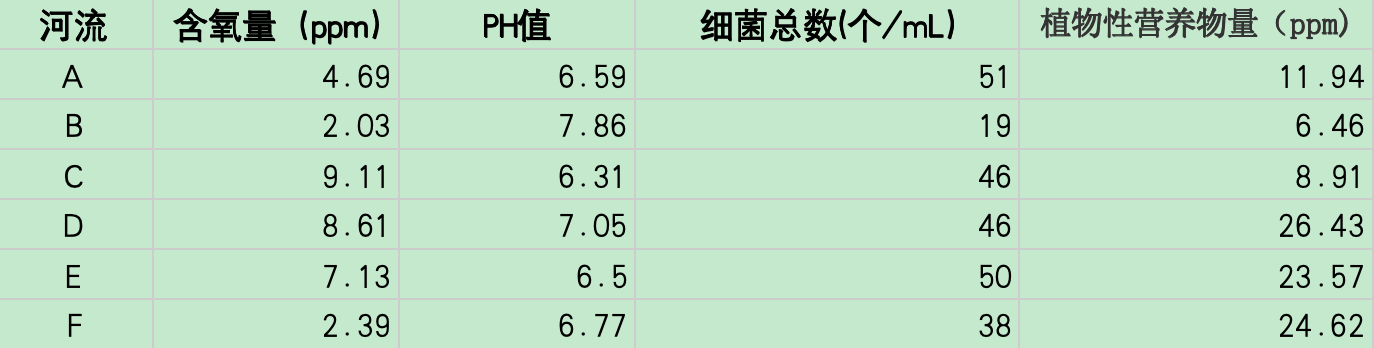
其中行代表每个评价方案（河流）、列代表评价方案的评价指标（含氧量、PH值、细菌总数、营养物量）用数学语言表述：

假设有n个评价对象，m个评价指标，则构成的评价矩阵为
$$X=[x_{ij}]_{n\times m} =\begin{bmatrix}
  &x_{11} &x_{12}  &\dots  &x_{1m} \\
  &x_{21} &x_{22}  &\dots &x_{2m} \\
  &\vdots   &\vdots  &\ddots   &\vdots\\
  &x_{n1} &x_{n2}  &\dots &x_{nm}
\end{bmatrix}$$

In [6]:
import pandas as pd
import numpy as np
# 读取数据
data = pd.read_excel('../data/数据预处理_river.xlsx', usecols=['含氧量（ppm)', 'PH值', '细菌总数(个/mL)', '植物性营养物量（ppm)'])
data.head(5)

,含氧量（ppm),PH值,细菌总数(个/mL),植物性营养物量（ppm)
0,4.69,6.59,51,11.94
1,2.03,7.86,19,6.46
2,9.11,6.31,46,8.91
3,8.61,7.05,46,26.43
4,7.13,6.50,50,23.57


In [7]:
# 转换为 ndarray
## 方法一：
X = data.values
X

## 方法二：
X = data.to_numpy()
X

array([[ 4.69,  6.59, 51.  , 11.94],
       [ 2.03,  7.86, 19.  ,  6.46],
       [ 9.11,  6.31, 46.  ,  8.91],
       [ 8.61,  7.05, 46.  , 26.43],
       [ 7.13,  6.5 , 50.  , 23.57],
       [ 2.39,  6.77, 38.  , 24.62],
       [ 7.69,  6.79, 38.  ,  6.01],
       [ 9.3 ,  6.81, 27.  , 31.57],
       [ 5.45,  7.62,  5.  , 18.46],
       [ 6.19,  7.27, 17.  ,  7.51],
       [ 7.93,  7.53,  9.  ,  6.52],
       [ 4.4 ,  7.28, 17.  , 25.3 ],
       [ 7.46,  8.24, 23.  , 14.42],
       [ 2.01,  5.55, 47.  , 26.31],
       [ 2.04,  6.4 , 23.  , 17.91],
       [ 7.73,  6.14, 52.  , 15.72],
       [ 6.35,  7.58, 25.  , 29.46],
       [ 8.29,  8.41, 39.  , 12.02],
       [ 3.54,  7.27, 54.  ,  3.16],
       [ 7.44,  6.26,  8.  , 28.41]])

## 正向化（一致化）处理：
目的: 将各个指标转化为极大型指标，统一指标对评价结果的影响。

指标分类
- 极大型指标（效益型）：指标数据越大越好 含氧量
- 极小型指标（成本型）：指标数据越小越好 细菌个数
- 中间型指标：指标数据越接近某个值越好 PH值
- 区间型指标：指标数据越接近某个区间越好 营养物质

注意：正向化公式不唯一，可以结合数据进行修改

![alt text](image.png)

### Min2Max —— 极小型指标
转换公式

![alt text](image-1.png) 

In [5]:
# Min2Max
def Min2Max(X, col):
    """
    对矩阵中的某一列进行最大值减去该列的数值

    Args:
        X (_type_): _待处理矩阵_
        col (_list_): _需要进行处理的列索引，从0开始算_
    """
    temp = X[:, col]
    temp1 = np.max(temp, axis=0) - temp
    X[:, col] = temp1
    return X

X = Min2Max(X, [2])
X

array([[ 4.69,  6.59,  3.  , 11.94],
       [ 2.03,  7.86, 35.  ,  6.46],
       [ 9.11,  6.31,  8.  ,  8.91],
       [ 8.61,  7.05,  8.  , 26.43],
       [ 7.13,  6.5 ,  4.  , 23.57],
       [ 2.39,  6.77, 16.  , 24.62],
       [ 7.69,  6.79, 16.  ,  6.01],
       [ 9.3 ,  6.81, 27.  , 31.57],
       [ 5.45,  7.62, 49.  , 18.46],
       [ 6.19,  7.27, 37.  ,  7.51],
       [ 7.93,  7.53, 45.  ,  6.52],
       [ 4.4 ,  7.28, 37.  , 25.3 ],
       [ 7.46,  8.24, 31.  , 14.42],
       [ 2.01,  5.55,  7.  , 26.31],
       [ 2.04,  6.4 , 31.  , 17.91],
       [ 7.73,  6.14,  2.  , 15.72],
       [ 6.35,  7.58, 29.  , 29.46],
       [ 8.29,  8.41, 15.  , 12.02],
       [ 3.54,  7.27,  0.  ,  3.16],
       [ 7.44,  6.26, 46.  , 28.41]])

In [11]:
X[:, [0,2]]

array([[ 4.69, 51.  ],
       [ 2.03, 19.  ],
       [ 9.11, 46.  ],
       [ 8.61, 46.  ],
       [ 7.13, 50.  ],
       [ 2.39, 38.  ],
       [ 7.69, 38.  ],
       [ 9.3 , 27.  ],
       [ 5.45,  5.  ],
       [ 6.19, 17.  ],
       [ 7.93,  9.  ],
       [ 4.4 , 17.  ],
       [ 7.46, 23.  ],
       [ 2.01, 47.  ],
       [ 2.04, 23.  ],
       [ 7.73, 52.  ],
       [ 6.35, 25.  ],
       [ 8.29, 39.  ],
       [ 3.54, 54.  ],
       [ 7.44,  8.  ]])

### 中间型指标
![alt text](image-4.png)


In [36]:
def Middle2Max(X, col, x_best):
    """
    对矩阵中的某一列进行最大值减去该列的数值

    Args:
        X (_type_): _待处理矩阵_
        col (_list_): _需要进行处理的列索引，从0开始算_
        x_best (_list_): _最好的特定值，需要与col相一致_
    """
    temp = X[:, col]
    X_best = np.array(x_best)
    dis = np.abs(temp - X_best) # (20, 2)
    M = np.max(dis, axis=0) # (2,)
    temp1 = 1 - dis / M
    X[:, col] = temp1
    return X

col = [1]
x_best = [7]
X = Middle2Max(X, col, x_best)

In [15]:
col = [1, 0]
x_best = [7,5]
temp = X[:, col]
X_best = np.array(x_best)
dis = np.abs(temp - X_best)
M = np.max(dis, axis=0)
temp1 = 1 - (dis / M)
X2 = X.copy()
X2[:, col] = temp1
X2

array([[9.27906977e-01, 7.17241379e-01, 5.10000000e+01, 1.19400000e+01],
       [3.09302326e-01, 4.06896552e-01, 1.90000000e+01, 6.46000000e+00],
       [4.41860465e-02, 5.24137931e-01, 4.60000000e+01, 8.91000000e+00],
       [1.60465116e-01, 9.65517241e-01, 4.60000000e+01, 2.64300000e+01],
       [5.04651163e-01, 6.55172414e-01, 5.00000000e+01, 2.35700000e+01],
       [3.93023256e-01, 8.41379310e-01, 3.80000000e+01, 2.46200000e+01],
       [3.74418605e-01, 8.55172414e-01, 3.80000000e+01, 6.01000000e+00],
       [0.00000000e+00, 8.68965517e-01, 2.70000000e+01, 3.15700000e+01],
       [8.95348837e-01, 5.72413793e-01, 5.00000000e+00, 1.84600000e+01],
       [7.23255814e-01, 8.13793103e-01, 1.70000000e+01, 7.51000000e+00],
       [3.18604651e-01, 6.34482759e-01, 9.00000000e+00, 6.52000000e+00],
       [8.60465116e-01, 8.06896552e-01, 1.70000000e+01, 2.53000000e+01],
       [4.27906977e-01, 1.44827586e-01, 2.30000000e+01, 1.44200000e+01],
       [3.04651163e-01, 0.00000000e+00, 4.70000000e

### 区间型指标
![alt text](image-5.png)

In [37]:
def Interval2Max(X, col, down, up):
    """
    对矩阵中的某一列进行最大值减去该列的数值

    Args:
        X (_type_): _待处理矩阵_
        col (_list_): _需要进行处理的列索引，从0开始算_
        down (_list_): _最小范围_
        up (_list_): _最大范围_
    """
    temp = X[:, col]
    down = np.array(down)
    up = np.array(up)
    M1 = down - np.min(temp, axis=0) # (3,)
    M2 = np.max(temp, axis=0) - up # (3,)
    M = np.vstack((M1, M2)).max(axis=0) # (3, )
    mask1 = temp < down
    temp[mask1] = (1 - (down - temp) / M)[mask1]
    mask2 = temp > up
    temp[mask2] = (1 - (temp - up) / M)[mask2]
    mask3 = (~mask1 & ~mask2)
    temp[mask3] = np.ones_like(mask3)[mask3]
    X[: ,col] = temp
    return X

# 已知植物性营养物量介于 10-20 最佳
col = [3]
down = [10]
up = [20]
X = Interval2Max(X, col, down, up)
X

array([[4.69000000e+00, 1.02463054e-01, 3.00000000e+00, 1.00000000e+00],
       [2.03000000e+00, 5.81280788e-02, 3.50000000e+01, 6.94036301e-01],
       [9.11000000e+00, 7.48768473e-02, 8.00000000e+00, 9.05790838e-01],
       [8.61000000e+00, 1.37931034e-01, 8.00000000e+00, 4.44252377e-01],
       [7.13000000e+00, 9.35960591e-02, 4.00000000e+00, 6.91443388e-01],
       [2.39000000e+00, 1.20197044e-01, 1.60000000e+01, 6.00691443e-01],
       [7.69000000e+00, 1.22167488e-01, 1.60000000e+01, 6.55142610e-01],
       [9.30000000e+00, 1.24137931e-01, 2.70000000e+01, 0.00000000e+00],
       [5.45000000e+00, 8.17733990e-02, 4.90000000e+01, 1.00000000e+00],
       [6.19000000e+00, 1.16256158e-01, 3.70000000e+01, 7.84788245e-01],
       [7.93000000e+00, 9.06403941e-02, 4.50000000e+01, 6.99222126e-01],
       [4.40000000e+00, 1.15270936e-01, 3.70000000e+01, 5.41918755e-01],
       [7.46000000e+00, 2.06896552e-02, 3.10000000e+01, 1.00000000e+00],
       [2.01000000e+00, 0.00000000e+00, 7.00000000e

In [26]:
# test
X = np.array([
    [35.2, 1, 35.2],
    [35.8, 2, 35.8],
    [36.6, 3, 36.6],
    [37.1, 4, 37.1],
    [37.8, 5, 37.8],
    [38.4, 6, 38.4]
])
col = [0, 1, 2]
down = [36, 3, 36]
up = [37, 4, 37]

temp = X[:, col]
a = np.array(down) - np.min(temp, axis=0)
b = np.max(temp, axis=0) - np.array(up)
M = np.vstack((a, b)).max(axis=0)
mask1 = temp < down
temp[mask1] = (1 - (down-temp)/M)[mask1]
mask2 = temp > up
temp[mask2] = (1 - (temp-up)/M)[mask2]
temp
mask3 = (~mask1) & (~mask2)
temp[mask3] = np.ones_like(temp)[mask3]
temp

array([[0.42857143, 0.        , 0.42857143],
       [0.85714286, 0.5       , 0.85714286],
       [1.        , 1.        , 1.        ],
       [0.92857143, 1.        , 0.92857143],
       [0.42857143, 0.5       , 0.42857143],
       [0.        , 0.        , 0.        ]])

## 标准化（规范化）处理
目的：为消除数据间量纲、数量级的影响。

注意事项：
1. 标准化要考虑到数据是否非负的问题。
2. 标准化不会改变变量之间的相关系数。
3. 标准化可以去除数据间数量级的关系，避免“大吃小的现象”。
4. 不是所有标准化最后的取值范围都是 0-1




### 标准化方法 —— 元素/所在列平方和
![alt text](image-6.png)

In [ ]:
test = np.array([
    [35.2, 1, 35.2],
    [35.8, 2, 35.8],
    [36.6, 3, 36.6],
    [37.1, 4, 37.1],
    [37.8, 5, 37.8],
    [38.4, 6, 38.4]
])
def normalize(X):
    # 套娃
    return X / np.power(np.square(X).sum(axis=0), 1/2)
normalize(test)
# test / np.power(np.square(test).sum(axis=0), 1/2)
# np.square(test).sum(axis=0)

array([[0.39014777, 0.10482848, 0.39014777],
       [0.39679801, 0.20965697, 0.39679801],
       [0.40566501, 0.31448545, 0.40566501],
       [0.41120688, 0.41931393, 0.41120688],
       [0.4189655 , 0.52414242, 0.4189655 ],
       [0.42561575, 0.6289709 , 0.42561575]])

### 标准化方法 —— Min-Max
Min-Max 规范化：将数据映射到[0,1]区间。

![alt text](image-2.png)

In [ ]:
import pandas as pd
import numpy as np

# Min-Max
def MinMaxScale(X, col):
    """

    Args:
        X (_type_): _待处理矩阵_
        col (_list_): _需要进行处理的列索引，从0开始算_
    """
    temp = X[:, col]
    temp1 = (np.max(temp, axis=0) - temp) / (np.max(temp, axis=0) - np.min(temp, axis=0))
    X[:, col] = temp1
    return X

MinMaxScale(X, [0, 1, 2, 3])

array([[0.63237311, 0.63636364, 0.06122449, 0.30904611],
       [0.99725652, 0.19230769, 0.71428571, 0.11615628],
       [0.0260631 , 0.73426573, 0.16326531, 0.20239352],
       [0.09465021, 0.47552448, 0.16326531, 0.81907779],
       [0.29766804, 0.66783217, 0.08163265, 0.71840901],
       [0.9478738 , 0.57342657, 0.32653061, 0.75536783],
       [0.22085048, 0.56643357, 0.32653061, 0.10031679],
       [0.        , 0.55944056, 0.55102041, 1.        ],
       [0.52812071, 0.27622378, 1.        , 0.53854277],
       [0.4266118 , 0.3986014 , 0.75510204, 0.1531151 ],
       [0.18792867, 0.30769231, 0.91836735, 0.11826822],
       [0.67215364, 0.3951049 , 0.75510204, 0.77930306],
       [0.25240055, 0.05944056, 0.63265306, 0.39633932],
       [1.        , 1.        , 0.14285714, 0.81485392],
       [0.99588477, 0.7027972 , 0.63265306, 0.51918339],
       [0.21536351, 0.79370629, 0.04081633, 0.44209785],
       [0.40466392, 0.29020979, 0.59183673, 0.92573038],
       [0.13854595, 0.        ,

### 标准化方法 —— Z-score
Z-score 规范化：新生成数据是均值为0，方差为1的，无量纲数据。

![alt text](image-3.png)

In [ ]:
# Min2Max
def ZScore(X, col):
    """
    Z-Score标准化

    Args:
        X (_type_): _待处理矩阵_
        col (_list_): _需要进行处理的列索引，从0开始算_
    """
    temp = X[:, col]
    temp1 = (temp - np.mean(temp, axis=0)) / np.std(temp, axis=0)
    X[:, col] = temp1
    return X

ZScore(X, [0, 1, 2, 3])

array([[ 0.53286197,  0.58825887, -1.22134776, -0.59340083],
       [ 1.62401889, -1.18419371,  0.8036848 , -1.20747628],
       [-1.28026344,  0.97903582, -0.90493643, -0.93293525],
       [-1.07515876, -0.05373183, -0.90493643,  1.03031327],
       [-0.46804889,  0.71386575, -1.1580655 ,  0.70982864],
       [ 1.47634352,  0.33704512, -0.39867829,  0.82748908],
       [-0.69776614,  0.30913248, -0.39867829, -1.25790219],
       [-1.35820322,  0.28121984,  0.29742666,  1.60628915],
       [ 0.22110285, -0.84924204,  1.68963654,  0.13721449],
       [-0.08245208, -0.36077086,  0.93024933, -1.08981584],
       [-0.79621639, -0.72363517,  1.43650747, -1.20075283],
       [ 0.65182269, -0.37472718,  0.93024933,  0.90368823],
       [-0.60341798, -1.71453386,  0.55055573, -0.31549807],
       [ 1.63222308,  2.0397161 , -0.96821869,  1.01686637],
       [ 1.6199168 ,  0.85342894,  0.55055573,  0.07558283],
       [-0.71417451,  1.21629325, -1.28463003, -0.16982324],
       [-0.14808558, -0.